/home/ljm/anaconda3/envs/jxtnett/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


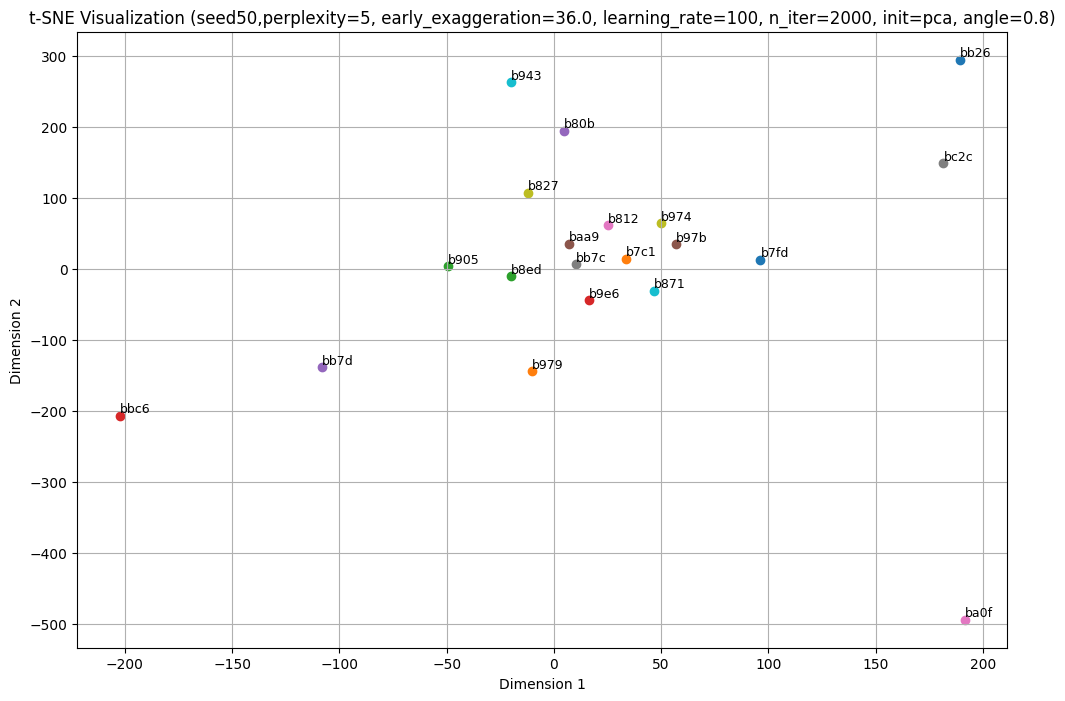

In [7]:
import open3d as o3d
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

def load_obj(file_path):
    mesh = o3d.io.read_triangle_mesh(file_path)
    return mesh

def sample_and_extract_features(mesh, num_points=1024):
    sampled_mesh = mesh.sample_points_uniformly(number_of_points=num_points)
    points = np.asarray(sampled_mesh.points)
    return points.flatten()

def create_incremental_dir(base_dir, folder_name):
    suffix = 1
    while True:
        # 构建目标文件夹路径
        target_dir = os.path.join(base_dir, folder_name if suffix == 1 else f"{folder_name}{suffix}")
        # 如果文件夹不存在，则创建并返回路径
        if not os.path.exists(target_dir):
            os.makedirs(target_dir)
            return target_dir
        # 如果文件夹已存在，则增加后缀
        suffix += 1

base_dir = '/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/outputGNN/tSNE'
folder_name = 'replecate50seed'
savedir = create_incremental_dir(base_dir, folder_name)

seed=50
# for seed in range(420):
np.random.seed(seed)

## 指定目录
# directory = '/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/plane202'
# # directory = '/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/planes'
# obj_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.obj')]
# plane_names = [os.path.basename(f)[:4] for f in obj_files]

plane_names = ['bb26', 'b979', 'b8ed', 'bbc6', 'bb7d', 'baa9', 'ba0f', 'bb7c', 'b827', 'b943',
               'b7fd', 'b7c1', 'b905', 'b9e6', 'b80b', 'b97b', 'b812', 'bc2c', 'b974', 'b871']



# # 提取每个模型的特征向量
# features = []
# for file in obj_files:
#     mesh = load_obj(file)
#     feature_vector = sample_and_extract_features(mesh, num_points=1024)
#     features.append(feature_vector)

# feature_matrix = np.array(features)
# np.save(os.path.join(savedir,f'{seed}init_feature.npy'), feature_matrix)


# # 使用PCA将特征向量降维到50维
# pca = PCA(n_components=8,random_state=seed) #这步有随机性。。
# pca_features = pca.fit_transform(feature_matrix)
# np.save(os.path.join(savedir,f'{seed}PCAout.npy'), pca_features)
pca_features = np.load(r'/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/outputGNN/tSNE/good/50PCAout.npy')

# 定义参数范围
perplexities = [5,]
# perplexities = [5, 10, 30, 50]
early_exaggerations = [36.0]
# early_exaggerations = [12.0, 24.0, 36.0]
learning_rates = [100]
# learning_rates = [10, 100, 200, 500]
n_iters = [2000]
# n_iters = [1000, 2000]
inits = ['pca']
# inits = ['pca', 'random']
angles = [0.8]
# angles = [0.2, 0.5, 0.8]

# 遍历参数组合
for perplexity in perplexities:
    for early_exaggeration in early_exaggerations:
        for learning_rate in learning_rates:
            for n_iter in n_iters:
                for init in inits:
                    for angle in angles:
                        tsne = TSNE(
                            n_components=2,
                            perplexity=perplexity,
                            early_exaggeration=early_exaggeration,
                            learning_rate=learning_rate,
                            n_iter=n_iter,
                            init=init,
                            angle=angle,
                            random_state=seed
                        ) #这步没有随机性了
                        # np.save(f'/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/output/PCA/tSNE2/sweepseed/{seed}t-SNE_pp{perplexity}_ee{early_exaggeration}_lr{learning_rate}_ni{n_iter}_init{init}_angle{angle}.npy', feature_matrix)

                        tsne_results = tsne.fit_transform(pca_features)

                        # 绘制结果
                        plt.figure(figsize=(12, 8))
                        for i, name in enumerate(plane_names):
                            plt.scatter(tsne_results[i, 0], tsne_results[i, 1], label=name)
                            # plt.text(tsne_results[i, 0], tsne_results[i, 1], name, fontsize=9, ha='left', va='bottom')
                            plt.text(tsne_results[i, 0], tsne_results[i, 1], name, fontsize=9, ha='left', va='bottom')
                        plt.title(f't-SNE Visualization (seed{seed},perplexity={perplexity}, early_exaggeration={early_exaggeration}, learning_rate={learning_rate}, n_iter={n_iter}, init={init}, angle={angle})')
                        plt.xlabel('Dimension 1')
                        plt.ylabel('Dimension 2')
                        plt.grid(True)
                        # plt.legend(title="Plane Names", loc='best', fontsize='small')
                        plt.savefig(os.path.join(savedir,f'{seed}t-SNE_pp{perplexity}_ee{early_exaggeration}_lr{learning_rate}_ni{n_iter}_init{init}_angle{angle}.png'))
                        plt.show()